# Image Classification of an American Sign Language Dataset

# Loading the Data
Dataset is in CSV format. To load and work with the data, we'll be using Pandas library.

In [6]:
import pandas as pd
training_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
validation_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Exploring the data

In [7]:
training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_train = training_df['label']
y_valid = validation_df['label']

del training_df['label']
del validation_df['label']

# Extracting the Images

In [9]:
x_train = training_df.values
x_valid = validation_df.values

# Summarizing the Training and Validation Data

In [10]:
x_train.shape, y_train.shape , x_valid.shape, y_valid.shape

((27455, 784), (27455,), (7172, 784), (7172,))

In [11]:
x_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

# Visualizing the Data
We need to represent 1D shape of 784 pixel, to a 2D shape of 28x28, same as with mnist data we need to reshape data

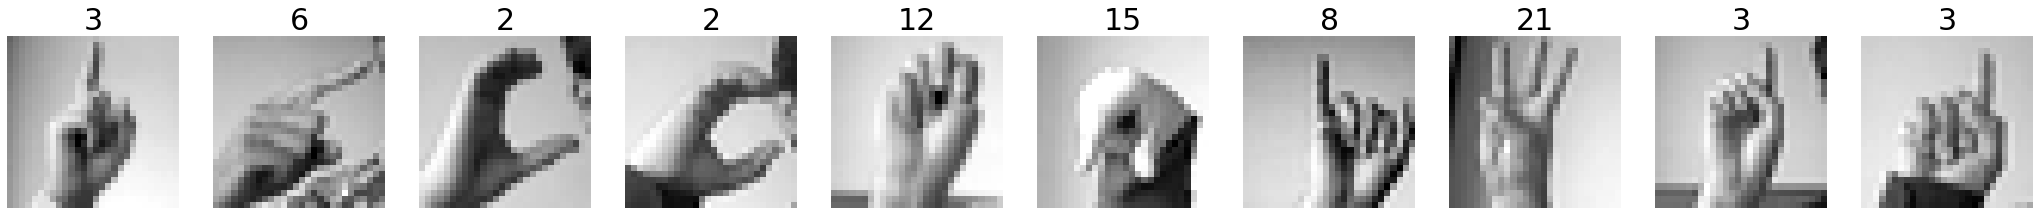

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1,num_images+1,i+1) # Show more than one image
    plt.title(label, fontdict = {'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap = 'gray')

# Normalize the Image Data

In [13]:
x_train.min(), x_train.max()

(0, 255)

In [14]:
x_train = x_train / 255
x_valid = x_valid / 255

# Categorize the Labels

In [15]:
y_train.min(), y_train.max()

(0, 23)

In [16]:
import tensorflow.keras as keras
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_train[0:23]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

# Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape=(784,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 24, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [18]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(
    x_train,y_train, epochs=20, verbose=1, validation_data=(x_valid,y_valid))

Epoch 1/20
858/858 [==============================] - 14s 13ms/step - loss: 1.9572 - accuracy: 0.3823 - val_loss: 1.3395 - val_accuracy: 0.5325
Epoch 2/20
858/858 [==============================] - 13s 15ms/step - loss: 0.9524 - accuracy: 0.6786 - val_loss: 1.1470 - val_accuracy: 0.6534
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.5903 - accuracy: 0.8035 - val_loss: 1.1568 - val_accuracy: 0.6919
Epoch 4/20
858/858 [==============================] - 11s 12ms/step - loss: 0.3909 - accuracy: 0.8726 - val_loss: 0.8741 - val_accuracy: 0.7430
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 0.2909 - accuracy: 0.9129 - val_loss: 0.7514 - val_accuracy: 0.8233
Epoch 6/20
858/858 [==============================] - 10s 11ms/step - loss: 0.2444 - accuracy: 0.9341 - val_loss: 3.2333 - val_accuracy: 0.5735
Epoch 7/20
858/858 [==============================] - 10s 12ms/step - loss: 0.2194 - accuracy: 0.9477 - val_loss: 1.2710 - val_accuracy:

# Summary
We can see that the training accuracy got to a high level, but validation accuracy was not as high.
This is an example of the model learning to categorize the training data, but performing poorly against new data that has not been trained on. This is a common issue called `overfitting`.